## Personality Prediction Using Machine Learning or Deep Learning

### Life cycle of Machine learning Project
##### ~ Understanding the Problem Statement<br>~ Data Collection<br>~ Data Checks to perform<br>~ Exploratory data analysis<br>~ Data Pre-Processing<br>~ Model Training<br>~ Choose best model

## 1)Problem Statement
##### This project determines the Myers-Briggs Personality of an individual based on their past tweets

## 2) Data Collection
##### ~ Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977<br>~ The data consists of 8 column and 1000 rows.

### 2.1 Import  Required Packages

In [1]:
import re
import numpy as np
import collections
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.svm import SVC

#### Import the CSV Data as Pandas DataFrame 

In [2]:
df = pd.read_csv("C:/Users/USER/Desktop/mbti/mbti_2/mbti_1.csv")

#### Show Top 10 Records

In [3]:
df.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


#### Shape of the dataset

In [4]:
df.shape

(8675, 2)

### 2.2 Dataset information
##### Introversion (I) /  Extroversion (E)<br>        Intuition (N) – Sensing (S)<br>     Thinking (T) – Feeling (F)<br>     Judging (J) – Perceiving (P)<br> ~ type:INTJ,INTP,ENTJ,ENTP,INFJ,INFP,ENFJ,ENFP,ISTJ,ISFJ,ESTJ,ESFJ,ISTP,ISFP,ESTP,ESFP<br>~ posts:Last 50 tweets

## 3. Data Checks to perform
##### ~ Check Missing values<br>~ Check Duplicates<br>~ Check data type<br>~ Check the number of unique values of each column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

type     0
posts    0
dtype: int64

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

### 3.3 Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

type       16
posts    8675
dtype: int64

# Data Exploring
### List of posts

In [9]:
[p.split('|||') for p in df.head(2).posts.values]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

### Distribution of the MBTI personality types

C:\Users\USER\anaconda3\again\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


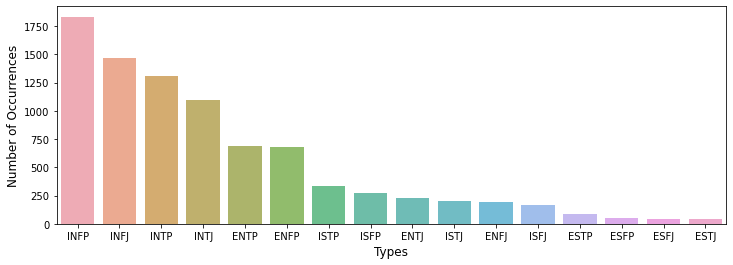

In [10]:
cnt_types = df['type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_types.index,cnt_types.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

### Add columns for the type Indicators

In [11]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E incorrect')
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S incorrect')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F incorrect')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P incorrect')
        
    return pd.Series( {'IE':I,'NS':N,'TF':T,'JP':J}) 

df = df.join(df.apply(lambda row: get_types(row),axis=1))
df.head(5)

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1


#### Count Introvert(I),Extrovert(E) : Intuition(N),Sensing(S) : Thinking(T),Feeling(F) : Judging(J),Perceiving(P) 

In [12]:
print ("Introversion (I) /  Extroversion (E):\t", df['IE'].value_counts()[0], " / ", df['IE'].value_counts()[1])
print ("Intuition (N) – Sensing (S):\t\t", df['NS'].value_counts()[0], " / ", df['NS'].value_counts()[1])
print ("Thinking (T) – Feeling (F):\t\t", df['TF'].value_counts()[0], " / ", df['TF'].value_counts()[1])
print ("Judging (J) – Perceiving (P):\t\t", df['JP'].value_counts()[0], " / ", df['JP'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 1999  /  6676
Intuition (N) – Sensing (S):		 1197  /  7478
Thinking (T) – Feeling (F):		 4694  /  3981
Judging (J) – Perceiving (P):		 5241  /  3434


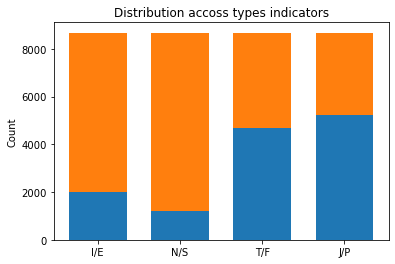

In [13]:
N = 4
but = (df['IE'].value_counts()[0], df['NS'].value_counts()[0], df['TF'].value_counts()[0], df['JP'].value_counts()[0])
top = (df['IE'].value_counts()[1], df['NS'].value_counts()[1], df['TF'].value_counts()[1], df['JP'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
width = 0.7      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, but, width)
p2 = plt.bar(ind, top, width, bottom=but)

plt.ylabel('Count')
plt.title('Distribution accoss types indicators')
plt.xticks(ind, ('I/E',  'N/S', 'T/F', 'J/P',))

plt.show()

### Pearson Features Correlation

In [14]:
df[['IE','NS','TF','JP']].corr()

,IE,NS,TF,JP
IE,1.000000,-0.045899,-0.069573,0.161939
NS,-0.045899,1.000000,-0.080954,0.014922
TF,-0.069573,-0.080954,1.000000,-0.004673
JP,0.161939,0.014922,-0.004673,1.000000


<AxesSubplot:title={'center':'Pearson Features Correlation'}>

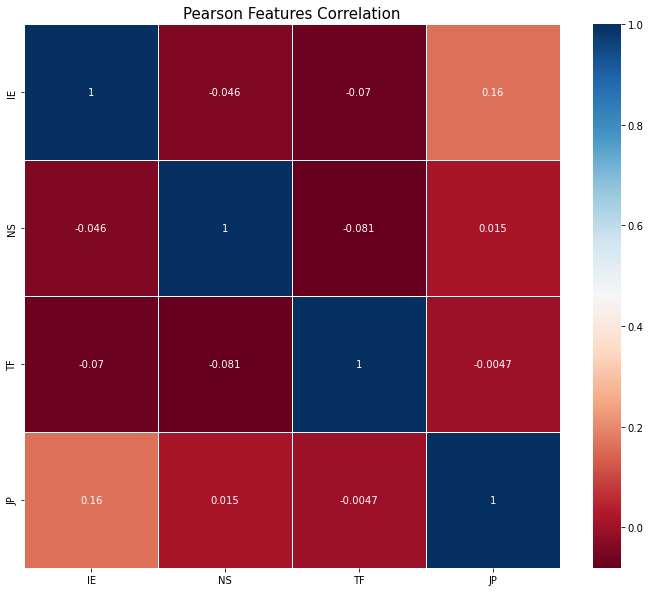

In [15]:
cmap = plt.cm.RdBu
corr = df[['IE','NS','TF','JP']].corr()
plt.figure(figsize=(12,10))
plt.title('Pearson Features Correlation', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)

##  Data preparation
##### Binarize type indicator

In [16]:
b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    
    return [b_Pers[l] for l in personality]

def translate_back(personality):
    # transform binary vector to mbti personality
    
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

# Check ...
d = df.head(4)
list_personality_bin = np.array([translate_personality(p) for p in d.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 [0 0 1 0]]


### Preprocessing posts
##### ~ Remove urls<br>~ Keep only words and put everything lowercase<br>~ Lemmatize each word<br>~ Remove MBTI profiles strings. Too many appear in the posts!

In [17]:
# We want to remove these from the posts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'] 
unique_type_list = [x.lower() for x in unique_type_list]

# Lemmatize
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

# Cache the stop words for speed 
cachedStopWords = stopwords.words("english")

def pre_process_data(data, remove_stop_words=True, remove_mbti_profiles=True):
    list_personality = []
    list_posts = []
    len_data = len(data)
    i=0
    
    for row in data.iterrows():
        i+=1
        #if (i % 500 == 0 or i == 1 or i == len_data):
           # print("%s of %s rows" % (i, len_data))

        ##### Remove and clean comments
        posts = row[1].posts
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
            
        if remove_mbti_profiles:
            for t in unique_type_list:
                temp = temp.replace(t,"")

        type_labelized = translate_personality(row[1].type)
        list_personality.append(type_labelized)
        list_posts.append(temp)

    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality

In [18]:
list_posts, list_personality  = pre_process_data(df.head(1), remove_stop_words=True)
print(list_posts, list_personality )

['   moment sportscenter top ten play prank life changing experience life repeat today may perc experience immerse last thing  friend posted facebook committing suicide next day rest peace hello  sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear  favorite video game growing current favorite video game cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always around yo  lady complimentary personality well 

In [19]:
list_posts, list_personality  = pre_process_data(df, remove_stop_words=True)

In [20]:
print("Num posts and personalities: ",  list_posts.shape, list_personality.shape)

Num posts and personalities:  (8675,) (8675, 4)


### Vectorize with count and tf-idf

In [21]:
# Posts to a matrix of token counts
cntizer=CountVectorizer(analyzer="word",max_features=1500,tokenizer=None,preprocessor=None,stop_words=None,max_df=0.7,min_df=0.1) 

# Learn the vocabulary dictionary and return term-document matrix
print("CountVectorizer...")
X_cnt = cntizer.fit_transform(list_posts)

# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

print("Tf-idf...")
# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()

feature_names = list(enumerate(cntizer.get_feature_names()))
feature_names

CountVectorizer...
Tf-idf...


C:\Users\USER\anaconda3\again\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[(0, 'ability'),
 (1, 'able'),
 (2, 'absolutely'),
 (3, 'accept'),
 (4, 'accurate'),
 (5, 'across'),
 (6, 'act'),
 (7, 'action'),
 (8, 'actual'),
 (9, 'actually'),
 (10, 'add'),
 (11, 'admit'),
 (12, 'advice'),
 (13, 'afraid'),
 (14, 'age'),
 (15, 'ago'),
 (16, 'agree'),
 (17, 'ah'),
 (18, 'almost'),
 (19, 'alone'),
 (20, 'along'),
 (21, 'already'),
 (22, 'although'),
 (23, 'amazing'),
 (24, 'amount'),
 (25, 'angry'),
 (26, 'animal'),
 (27, 'annoying'),
 (28, 'another'),
 (29, 'answer'),
 (30, 'anxiety'),
 (31, 'anymore'),
 (32, 'anyone'),
 (33, 'anything'),
 (34, 'anyway'),
 (35, 'apparently'),
 (36, 'appreciate'),
 (37, 'approach'),
 (38, 'area'),
 (39, 'argument'),
 (40, 'around'),
 (41, 'art'),
 (42, 'ask'),
 (43, 'asked'),
 (44, 'asking'),
 (45, 'aspect'),
 (46, 'assume'),
 (47, 'attention'),
 (48, 'attracted'),
 (49, 'avatar'),
 (50, 'avoid'),
 (51, 'aware'),
 (52, 'away'),
 (53, 'awesome'),
 (54, 'awkward'),
 (55, 'baby'),
 (56, 'back'),
 (57, 'bad'),
 (58, 'based'),
 (59, 'basi

In [22]:
X_tfidf.shape

(8675, 791)

### Tf-idf representation of posts

In [23]:
print("X: Posts in tf-idf representation \n* 1st row:\n%s" % X_tfidf[0])

X: Posts in tf-idf representation 
* 1st row:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.08042209 0.06830218 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.10331537 0.         0.04973404 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.10984584 0.         0.         0.         0.08642509
 0.         0.         0.10488948 0.         0.         0.
 0.         0.         0.05188886 0.06824736 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0

In [24]:
type_indicators = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) – Sensing (S)", 
                   "FT: Feeling (F) - Thinking (T)", "JP: Judging (J) – Perceiving (P)"  ]

for l in range(len(type_indicators)):
    print(type_indicators[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) – Sensing (S)
FT: Feeling (F) - Thinking (T)
JP: Judging (J) – Perceiving (P)


In [25]:
print("MBTI 1st row: %s" % translate_back(list_personality[0,:]))
print("Y: Binarized MBTI 1st row: %s" % list_personality[0,:])

MBTI 1st row: INFJ
Y: Binarized MBTI 1st row: [0 0 0 0]


### Train test split

In [26]:
X = X_tfidf

# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    # Let's train type indicator individually
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    print(X_train.shape, X_test.shape)

IE: Introversion (I) / Extroversion (E) ...
(5812, 791) (2863, 791)
NS: Intuition (N) – Sensing (S) ...
(5812, 791) (2863, 791)
FT: Feeling (F) - Thinking (T) ...
(5812, 791) (2863, 791)
JP: Judging (J) – Perceiving (P) ...
(5812, 791) (2863, 791)


In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "LogisticRegression":LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(), 
    "Support Vector Machine": SVC(random_state=1),
}
# Posts in tf-idf representation
X = X_tfidf

model_list = []
accuracy_m =[]

# Individually training each mbti personlity type
for i in range(len(list(models))):
    # fit model on training data
    model = list(models.values())[i]
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    for l in range(len(type_indicators)):
    
        Y = list_personality[:,l]

        # split data into train and test sets
        seed = 7
        test_size = 0.33
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
        
        model.fit(X_train, y_train)
        # make predictions for test data
        y_pred = model.predict(X_test)
        predictions = [round(value) for value in y_pred]
        
        # evaluate predictions
        accuracy = accuracy_score(y_test, predictions)
        print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))
        
    print('='*35)
    print('\n')

Linear Regression
* IE: Introversion (I) / Extroversion (E) Accuracy: 76.84%
* NS: Intuition (N) – Sensing (S) Accuracy: 86.06%
* FT: Feeling (F) - Thinking (T) Accuracy: 74.54%
* JP: Judging (J) – Perceiving (P) Accuracy: 64.97%


LogisticRegression
* IE: Introversion (I) / Extroversion (E) Accuracy: 79.43%
* NS: Intuition (N) – Sensing (S) Accuracy: 86.17%
* FT: Feeling (F) - Thinking (T) Accuracy: 76.95%
* JP: Judging (J) – Perceiving (P) Accuracy: 66.54%


K-Neighbors Classifier
* IE: Introversion (I) / Extroversion (E) Accuracy: 76.07%
* NS: Intuition (N) – Sensing (S) Accuracy: 80.58%
* FT: Feeling (F) - Thinking (T) Accuracy: 62.03%
* JP: Judging (J) – Perceiving (P) Accuracy: 60.57%


Decision Tree Classifier
* IE: Introversion (I) / Extroversion (E) Accuracy: 65.98%
* NS: Intuition (N) – Sensing (S) Accuracy: 76.28%
* FT: Feeling (F) - Thinking (T) Accuracy: 58.64%
* JP: Judging (J) – Perceiving (P) Accuracy: 54.59%


Random Forest Classifier
* IE: Introversion (I) / Extrovers

### Insight<br>Logistic Regression is the best model

## Evaluating the model using sample

In [30]:
my_posts  = """Getting started with data science and applying machine learning has never been as simple as it is now. There are many free and paid online tutorials and courses out there to help you to get started. I’ve recently started to learn, play, and work on Data Science & Machine Learning on Kaggle.com. In this brief post, I’d like to share my experience with the Kaggle Python Docker image, which simplifies the Data Scientist’s life.
Awesome #AWS monitoring introduction.
HPE Software (now @MicroFocusSW) won the platinum reader's choice #ITAWARDS 2017 in the new category #CloudMonitoring
Certified as AWS Certified Solutions Architect 
Hi, please have a look at my Udacity interview about online learning and machine learning,
Very interesting to see the  lessons learnt during the HP Operations Orchestration to CloudSlang journey. http://bit.ly/1Xo41ci 
I came across a post on devopsdigest.com and need your input: “70% DevOps organizations Unhappy with DevOps Monitoring Tools”
In a similar investigation I found out that many DevOps organizations use several monitoring tools in parallel. Senu, Nagios, LogStach and SaaS offerings such as DataDog or SignalFX to name a few. However, one element is missing: Consolidation of alerts and status in a single pane of glass, which enables fast remediation of application and infrastructure uptime and performance issues.
Sure, there are commercial tools on the market for exactly this use case but these tools are not necessarily optimized for DevOps.
So, here my question to you: In your DevOps project, have you encountered that the lack of consolidation of alerts and status is a real issue? If yes, how did you approach the problem? Or is an ChatOps approach just right?
You will probably hear more and more about ChatOps - at conferences, DevOps meet-ups or simply from your co-worker at the coffee station. ChatOps is a term and concept coined by GitHub. It's about the conversation-driven development, automation, and operations.
Now the question is: why and how would I, as an ops-focused engineer, implement and use ChatOps in my organization? The next question then is: How to include my tools into the chat conversation?
Let’s begin by having a look at a use case. The Closed Looped Incidents Process (CLIP) can be rejuvenated with ChatOps. The work from the incident detection runs through monitoring until the resolution of issues in your application or infrastructure can be accelerated with improved, cross-team communication and collaboration.
In this blog post, I am going to describe and share my experience with deploying HP Operations Manager i 10.0 (OMi) on HP Helion Public Cloud. An Infrastructure as a Service platform such as HP Helion Public Cloud Compute is a great place to quickly spin-up a Linux server and install HP Operations Manager i for various use scenarios. An example of a good use case is monitoring workloads across public clouds such as AWS and Azure.
"""
# The type is just a dummy so that the data prep fucntion can be reused
mydata = pd.DataFrame(data={'type': ['INFJ'], 'posts': [my_posts]})

my_posts, dummy  = pre_process_data(mydata, remove_stop_words=True)

my_X_cnt = cntizer.transform(my_posts)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [33]:
result = []
# Let's train type indicator individually
for l in range(len(type_indicators)):
    #print("%s ..." % (type_indicators[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # make predictions for my  data
    y_pred = model.predict(my_X_tfidf)
    result.append(y_pred[0])
    # print("* %s prediction: %s" % (type_indicators[l], y_pred))
print("The result is: ", translate_back(result))

The result is:  INTJ


### The result is very close to actual result